# Unifying `F-4`data

In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

In [3]:
cd ~/Desktop/Tesis/F4

/home/luis/Desktop/Tesis/F4


In [4]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [5]:
logs = os.listdir()
logs = [s for s in logs if ".LAS" in s]
logs.sort()
logs

['WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_4.LAS']

In [6]:
i = 2
for las in logs:
    print("\nRun_"+str(i))
    sc.logs_LAS(las)
    i+=1


Run_2
File: WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS
TIME	    .HHMMSS	       :
DATE	    .D		       :
DEPT        .M                 : Bit Depth 2hz
ROP5        .M/HR              : 5ft ROP 2hz
GRM1        .GAPI              : MWD GR(TM) 2hz
BPOS        .M                 : Block Position 2hz
BVEL        .M/S               : Block Velocity 2hz
SWOB        .KKGF              : Surface Weight on Bit 2hz
HKLD        .KKGF              : Measured Hookload 2hz
TQA         .KMDN              : SRF STOR 2hz
RPM         .RPM               : SRF SRPM 2hz
Stick_RT    .RPM               : MWD PKtoPK RPM 2hz
CRPM_RT     .RPM               : MWD CRPM 2hz
TFLO        .LPM               : HSPM Total Pump Flow 2hz
TRPM_RT     .RPM               : MWD TUR_RPM 2hz
SPPA        .BAR               : SRF PUMPRS 2hz
SHKRSK_RT   .----              : MWD SHKRSK 2hz
SHKPK_RT    .G                 : MWD SHK_PK 2hz
INCL_CONT_RT.DEG               : MWD Cont Inc 2hz
#

Run_3
File: WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS
TIME	

In [32]:
cd ~/Desktop/Tesis/F4/CSVs

/home/luis/Desktop/Tesis/F4/CSVs


In [53]:
files = os.listdir()
files.sort()
files

['run_2.csv', 'run_3.csv', 'run_4.csv', 'run_5.csv']

In [60]:
dfs = []
for elements in files:
    df = pd.read_csv(elements)
    dfs.append(df)

In [61]:
run_2 = dfs[0]
run_3 = dfs[1]
run_4 = dfs[2]
run_5 = dfs[3]

In [62]:
runs = [run_2,run_3,run_4,run_5]
runs_txt = ["run_2","run_3","run_4","run_5"]
sections  =  ['17 1/2"','12 1/4"','8 1/2"','8 1/2"']
info = list(zip(runs_txt,sections))
info

[('run_2', '17 1/2"'),
 ('run_3', '12 1/4"'),
 ('run_4', '8 1/2"'),
 ('run_5', '8 1/2"')]

## Log standarization

Logs that are constant through the BHA
* BPOS 
* BVEL
* DateTime
* ROP5
* SWOB
* HKLD
* TQA
* RPM
* Stick_RT
* TFLO
* SPPA
* SHKPK_RT
* SHKRSK_RT 
* GMRAy

In [63]:
i = 0 
for run in runs:
    print("\n",runs_txt[i])
    run.drop(["TRPM_RT","Flag","BONB","HDTH"],inplace=True,axis=1)
    print("Logs:\n",np.sort(run.columns.values))
    i+=1
    


 run_2
Logs:
 ['BPOS' 'BVEL' 'CRPM_RT' 'DEPT' 'DateTime' 'GRM1' 'HKLD' 'INCL_CONT_RT'
 'ROP5' 'RPM' 'Run' 'SHKPK_RT' 'SHKRSK_RT' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO'
 'TQA' 'Well']

 run_3
Logs:
 ['APRS_ARC' 'ARC_GR_RT' 'ATMP' 'BPOS' 'BVEL' 'DEPT' 'DateTime' 'ECD_ARC'
 'HKLD' 'NRPM_RT' 'PDINCL' 'PDSHKRSK' 'PD_STKSLP' 'ROP5' 'RPM' 'Run'
 'SHKRSK_RT' 'SPM1' 'SPM2' 'SPM3' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA'
 'Well']

 run_4
Logs:
 ['AJAM_MWD' 'BPOS' 'BVEL' 'CRPM_RT' 'DEPT' 'DHAP' 'DRPM' 'DateTime' 'ECD'
 'GRMA_DH_ECO_RT' 'HKLD' 'PDSHKRSK' 'ROP5' 'RPM' 'Run' 'SHKL_DH_ECO_RT'
 'SHKPK_RT' 'SHKRATE_RT' 'SHKRSK_RT' 'SHKTOT_RT' 'SHK_ISONIC_RT' 'SPM1'
 'SPM2' 'SPM3' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'VIB_LAT' 'VIB_X'
 'Well']

 run_5
Logs:
 ['AJAM_MWD' 'BPOS' 'BVEL' 'CRPM_RT' 'DEPT' 'DHAP' 'DRPM' 'DateTime' 'ECD'
 'GRMA_DH_ECO_RT' 'HKLD' 'PDSHKRSK' 'ROP5' 'RPM' 'Run' 'SHKL_DH_ECO_RT'
 'SHKPK_RT' 'SHKRATE_RT' 'SHKRSK_RT' 'SHKTOT_RT' 'SHK_ISONIC_RT' 'SPM1'
 'SPM2' 'SPM3' 'SPPA' 'SWOB' 'Stick_RT'

In [64]:
runs[0].drop(['SHKPK_RT','CRPM_RT','INCL_CONT_RT','SHKRSK_RT'],axis=1,inplace=True)
runs[1].drop(['APRS_ARC','ATMP','NRPM_RT','PDINCL','PDSHKRSK','PD_STKSLP','SHKRSK_RT','SPM1','SPM2','SPM3','ECD_ARC'],axis=1,inplace=True)
runs[2].drop(['AJAM_MWD','CRPM_RT','DHAP','DRPM','PDSHKRSK','SHKL_DH_ECO_RT','SHKPK_RT','SHKRATE_RT','SHKRSK_RT','SHKTOT_RT','ECD','SHK_ISONIC_RT','SPM1','SPM2','SPM3','VIB_LAT','VIB_X'],axis=1,inplace=True)
runs[3].drop(['AJAM_MWD','CRPM_RT','DHAP','DRPM','PDSHKRSK','SHKL_DH_ECO_RT','SHKPK_RT','SHKRATE_RT','SHKRSK_RT','SHKTOT_RT','ECD','SHK_ISONIC_RT','SPM1','SPM2','SPM3','VIB_LAT','VIB_X'],axis=1,inplace=True)

In [65]:
i = 0 
for run in runs:
    print("\n",runs_txt[i])
    print("Logs:\n",np.sort(run.columns.values))
    i+=1


 run_2
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GRM1' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_3
Logs:
 ['ARC_GR_RT' 'BPOS' 'BVEL' 'DEPT' 'DateTime' 'HKLD' 'ROP5' 'RPM' 'Run'
 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_4
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GRMA_DH_ECO_RT' 'HKLD' 'ROP5' 'RPM'
 'Run' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_5
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GRMA_DH_ECO_RT' 'HKLD' 'ROP5' 'RPM'
 'Run' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']


In [66]:
runs[0].rename({'GRM1':"GR"},axis=1,inplace=True)
runs[1].rename({'ARC_GR_RT':'GR'},axis=1,inplace=True)
runs[2].rename({'GRMA_DH_ECO_RT':"GR"},axis=1,inplace=True)
runs[3].rename({'GRMA_DH_ECO_RT':'GR'},axis=1,inplace=True)

In [67]:
for run in runs:
    cols = ['BPOS', 'BVEL', 'DEPT', 'DateTime','GR', 'HKLD', 'ROP5','RPM', 'Run', 'SPPA', 'SWOB', 'Stick_RT','TFLO', 'TQA', 'Well']
    run = run.reindex(columns=cols)

In [68]:
i = 0 
for run in runs:
    print("\n",runs_txt[i])
    print("Logs:\n",np.sort(run.columns.values))
    i+=1


 run_2
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_3
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_4
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_5
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']


Gamma Ray


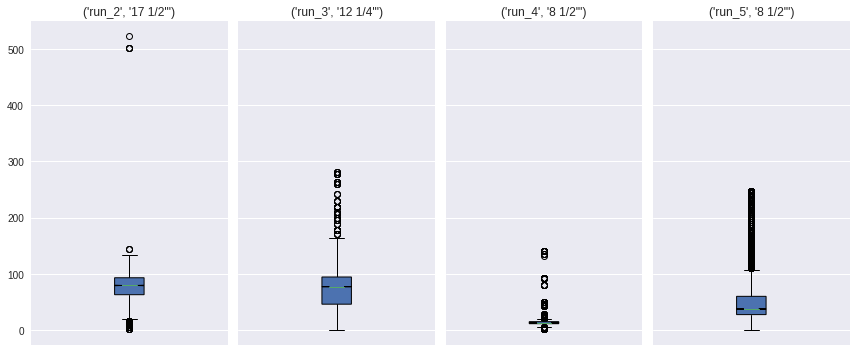

In [69]:
sc.boxplt_logs(runs,"GR","Gamma Ray",info)

In [71]:
cols = runs[0].columns.difference(["DateTime","Run","Well"])

In [72]:
cols

Index(['BPOS', 'BVEL', 'DEPT', 'GR', 'HKLD', 'ROP5', 'RPM', 'SPPA', 'SWOB',
       'Stick_RT', 'TFLO', 'TQA'],
      dtype='object')

BPOS


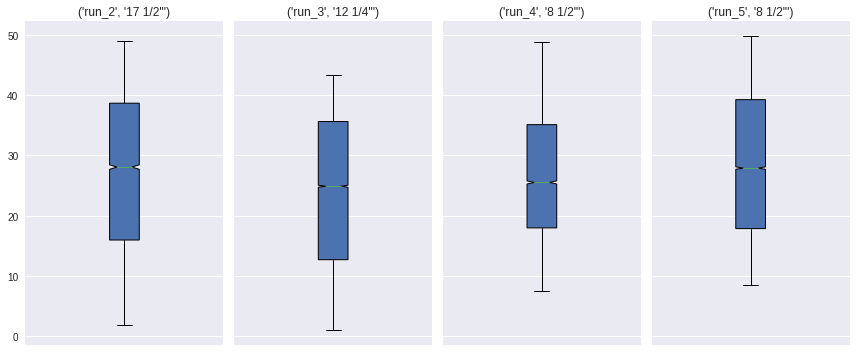

BVEL


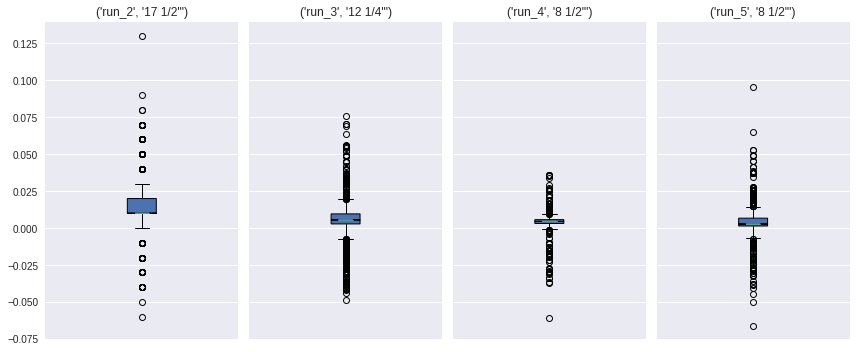

DEPT


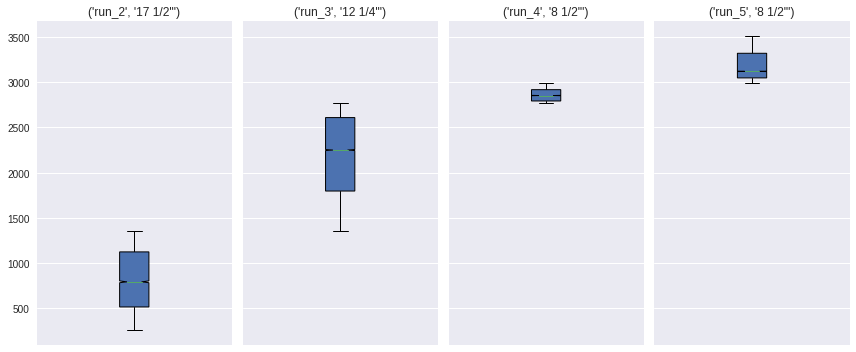

GR


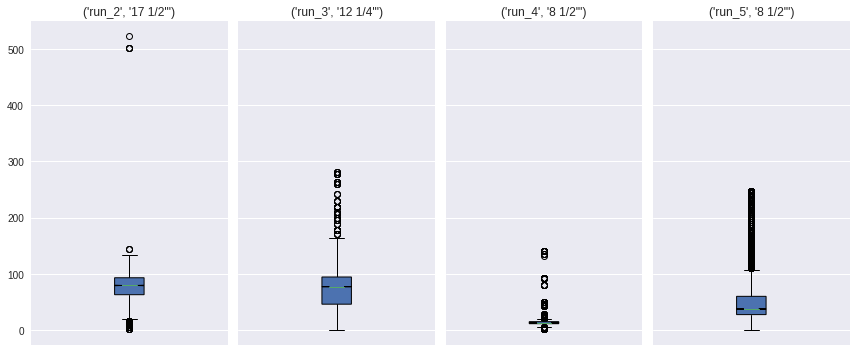

HKLD


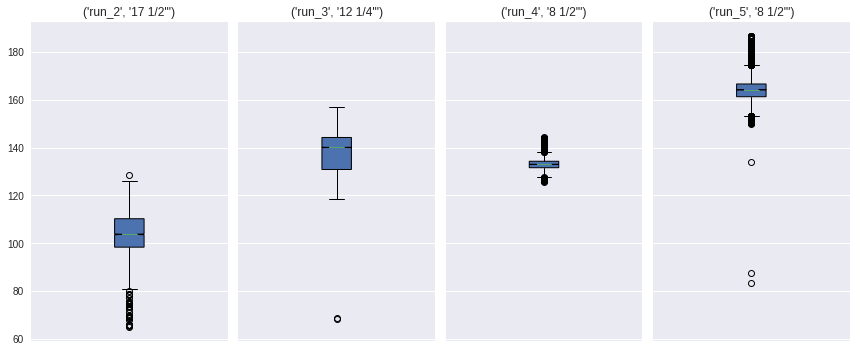

ROP5


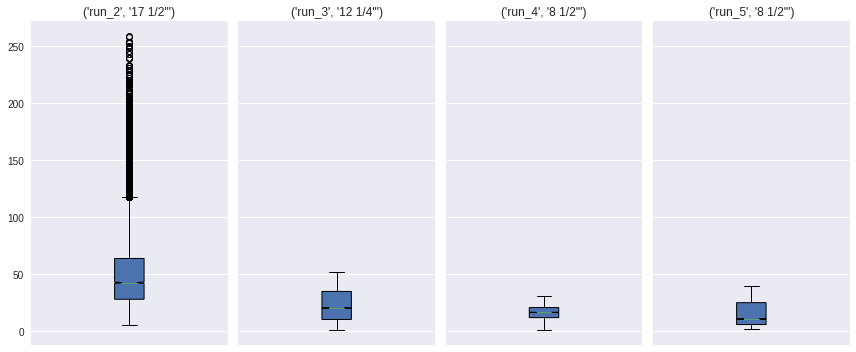

RPM


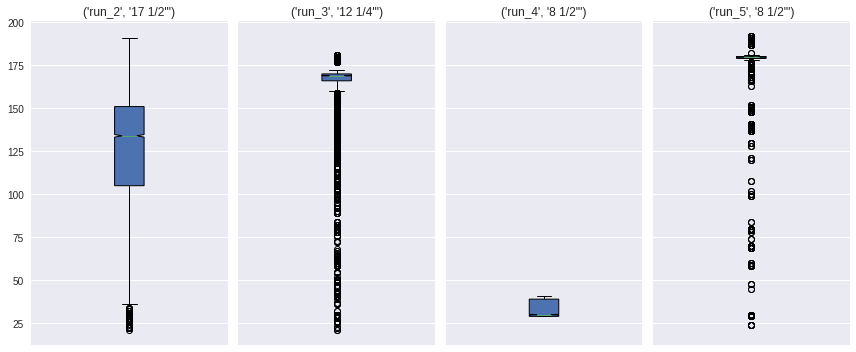

SPPA


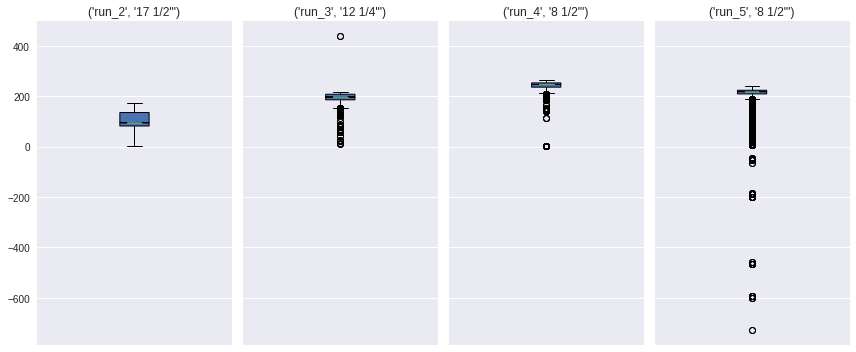

SWOB


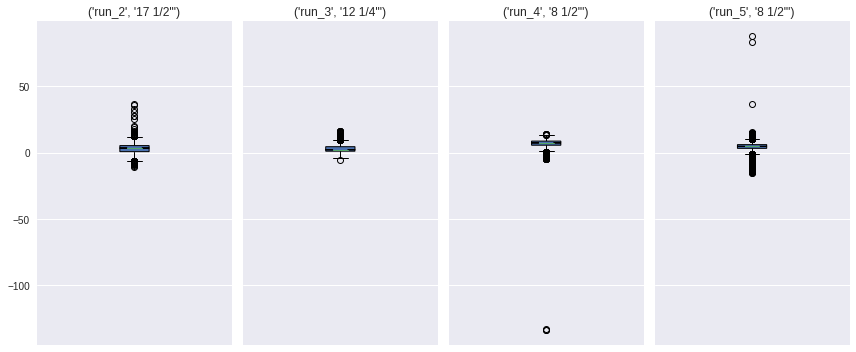

Stick_RT


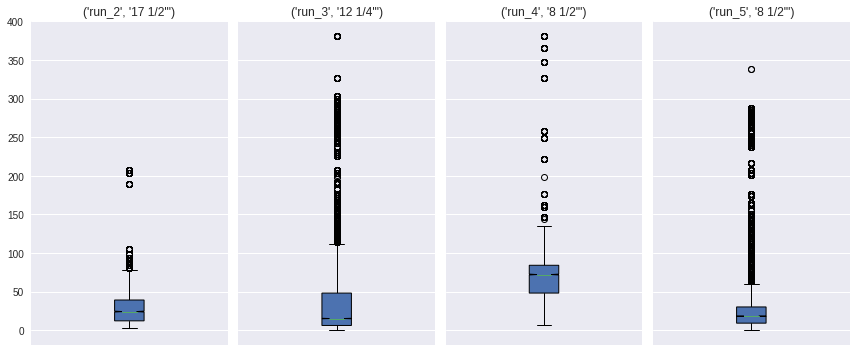

TFLO


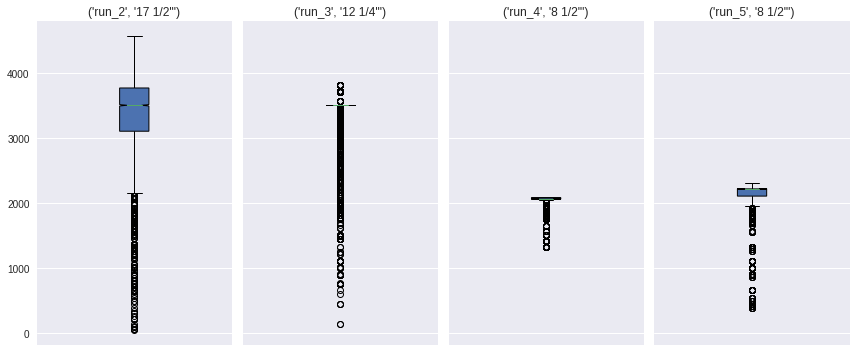

TQA


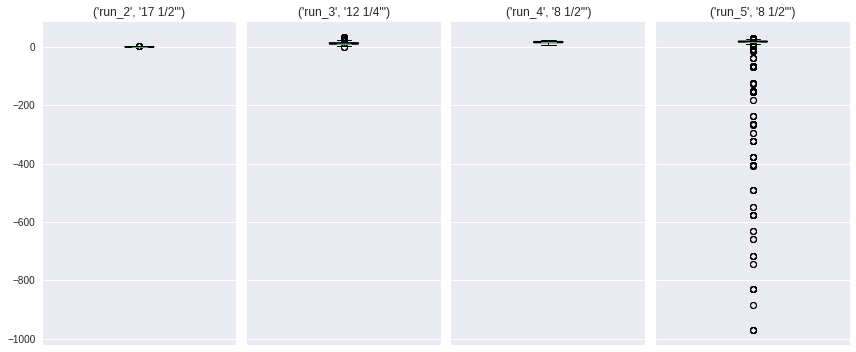

In [73]:
i = 0
for log in cols:
    sc.boxplt_logs(runs,cols[i],cols[i],info)
    i+=1

## Concatenating

In [74]:
df = pd.concat(runs)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96202 entries, 0 to 27324
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DEPT      96202 non-null  float64       
 1   ROP5      95979 non-null  float64       
 2   GR        93976 non-null  float64       
 3   BPOS      96202 non-null  float64       
 4   BVEL      96202 non-null  float64       
 5   SWOB      96202 non-null  float64       
 6   HKLD      96202 non-null  float64       
 7   TQA       96202 non-null  float64       
 8   RPM       96202 non-null  float64       
 9   Stick_RT  89227 non-null  float64       
 10  TFLO      96202 non-null  float64       
 11  SPPA      96202 non-null  float64       
 12  DateTime  96202 non-null  datetime64[ns]
 13  Well      96202 non-null  object        
 14  Run       96202 non-null  object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 11.7+ MB


In [85]:
df["DateTime"] = pd.to_datetime(df["DateTime"])
cols = df.columns.difference(["Run","Well"])
plt_df = pd.DataFrame(df,columns = cols)

In [88]:
plt_df

BPOS  BVEL       DEPT            DateTime       GR      HKLD  \
0      48.8000   0.0   260.4200 2007-10-13 15:44:50      NaN   95.9500   
1      48.8000   0.0   260.4200 2007-10-13 15:45:00      NaN   96.1000   
2      48.8000   0.0   260.4200 2007-10-13 15:45:20      NaN   96.2500   
3      48.8000   0.0   260.4200 2007-10-13 15:45:30      NaN   96.3900   
4      48.8000   0.0   260.4200 2007-10-13 15:46:00      NaN   96.5000   
...        ...   ...        ...                 ...      ...       ...   
27320  45.6775   0.0  3509.7268 2008-02-15 17:32:07  60.0625  174.7858   
27321  45.6775   0.0  3509.7268 2008-02-15 17:32:12  60.0625  174.8858   
27322  45.6775   0.0  3509.7268 2008-02-15 17:32:17  60.0625  174.8907   
27323  45.6775   0.0  3509.7268 2008-02-15 17:32:22  60.0625  174.8787   
27324  45.6775   0.0  3509.7268 2008-02-15 17:32:27  60.0625  174.8087   

          ROP5    RPM      SPPA    SWOB  Stick_RT       TFLO      TQA  
0          NaN   23.0    5.2200  6.9900       NaN   443.1000   0.0000  
1          NaN   23.0    5.5100  6.8300       NaN   886.1900   0.0000  
2          NaN   26.0    5.6800  6.6800       NaN   886.1900   0.0000  
3          NaN   26.0    5.6700  6.5400       NaN   886.1900   0.0000  
4          NaN   26.0    5.6500  6.4400       NaN   886.1900   0.0000  
...        ...    ...       ...     ...       ...        ...      ...  
27320  18.5244  149.0  209.1116 -1.5958      18.0  2104.2465  19.7088  
27321  18.5244  149.0  209.1116 -1.6958      18.0  2104.2465  19.7088  
27322  18.5244  149.0  209.1116 -1.7007      18.0  2104.2465  19.7088  
27323  18.5244  151.0  208.5047 -1.6887      18.0  2104.2465  17.9072  
27324  18.5244  151.0  208.5047 -1.6187      18.0  2104.2465  17.9072  

[96202 rows x 13 columns]

Plot: Whole 	Section: Whole


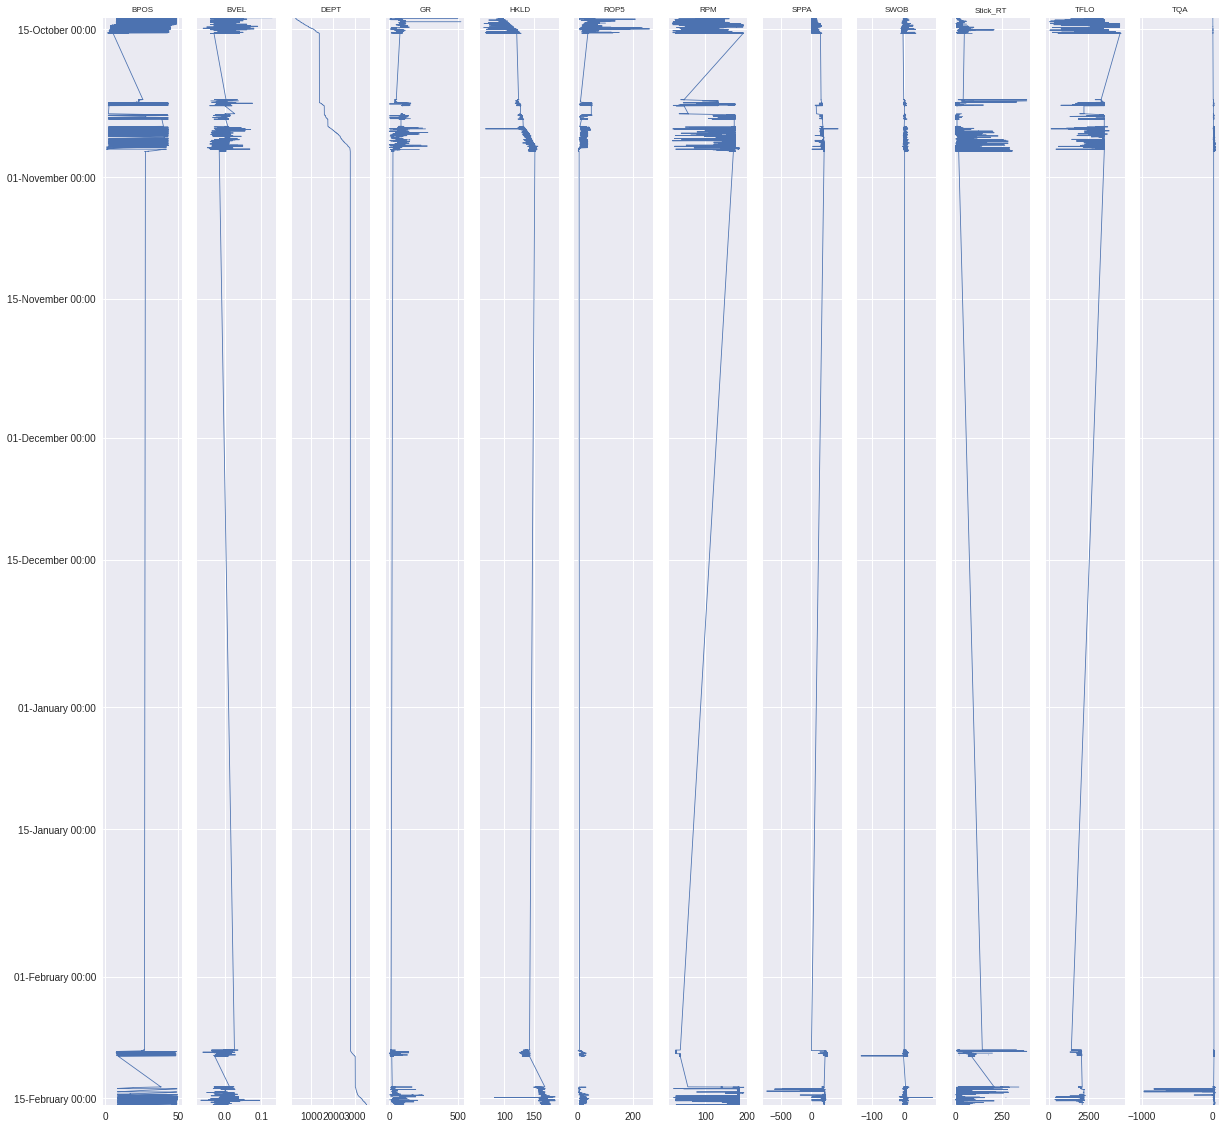




CPU times: user 6.02 s, sys: 115 ms, total: 6.14 s
Wall time: 6.22 s


In [90]:
%%time
sc.well_plt(plt_df,["Whole","Whole"])

In [76]:
df.to_csv(r"WellboreF4.csv",index=False)